Hello! Let's explore some US bikeshare data!
Would you like to see data for Chicago(enter'CHI'), New York (enter 'NYC')  or Washington? (enter 'WDC')chi
Would you like to see data for 'all' months or for 'january' or 'february' or 'march' or 'april' or 'may' or 'june'?all
Would you like to see data for 'all' days of the week or 'monday' or 'tuesday' or 'wednesday' or 'thursday' or 'friday' or 'saturday' or 'sunday'?all
----------------------------------------

Calculating The Most Frequent Times of Travel...

The most frequent month is:  6
The most frequent day of week is:  Tuesday
Most Frequent Start Hour:  17

Maximum number of Trips per Hour 517

This took 0.22972559928894043 seconds.


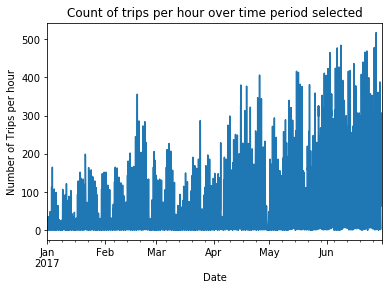

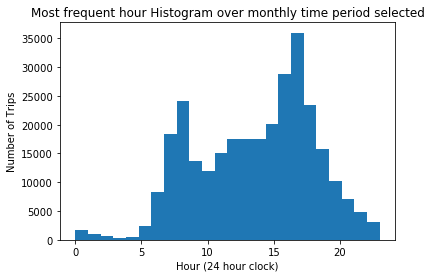

----------------------------------------

Calculating The Most Popular Stations and Trip...

The most commonly used start station is:  Streeter Dr & Grand Ave
The most commonly used end station is:  Streeter Dr & Grand Ave
The most frequent journey is: Start: Lake Shore Dr & Monroe St | End: Streeter Dr & Grand Ave

This took 0.6758460998535156 seconds.
----------------------------------------

Calculating Trip Duration...

Total customer seconds travelled during selected period:  280871787
Mean travel time in seconds:  936.23929

This took 0.0020062923431396484 seconds.

The Plot below shows actual daily means 'unsmoothed' and the daily mean 'smoothed' (7-day rolling): 

N.B. Line graph of daily means will only be populated with data if 'all' days of the week have been selected


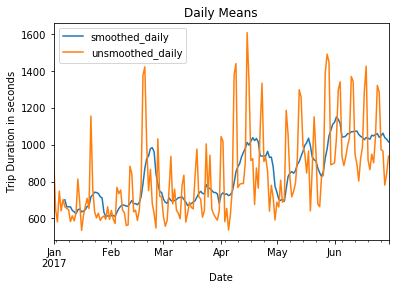

----------------------------------------

Calculating User Stats...

Subscriber    238889
Customer       61110
Dependent          1
Name: User Type, dtype: int64
Male      181190
Female     57758
Name: Gender, dtype: int64
Earliest year of birth:  1916

Most recent year of birth:  2004

Most common year of birth:  1989

This took 0.2567465305328369 seconds.

Age profile of trip takers (N.B. data filtered to include birth dates > 1910 and < 2005): 


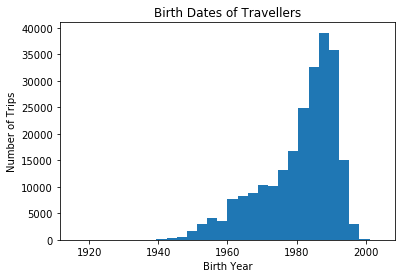

----------------------------------------
Would you like to see (another) five lines of raw input data? Enter yes or no.
yes
                     Unnamed: 0             End Time  Trip Duration  \
Start Time                                                            
2017-06-23 15:09:32     1423854  2017-06-23 15:14:53            321   
2017-05-25 18:19:03      955915  2017-05-25 18:45:53           1610   
2017-01-04 08:27:49        9031  2017-01-04 08:34:45            416   
2017-03-06 13:49:38      304487  2017-03-06 13:55:28            350   
2017-01-17 14:53:07       45207  2017-01-17 15:02:01            534   

                                     Start Station  \
Start Time                                           
2017-06-23 15:09:32           Wood St & Hubbard St   
2017-05-25 18:19:03            Theater on the Lake   
2017-01-04 08:27:49             May St & Taylor St   
2017-03-06 13:49:38  Christiana Ave & Lawrence Ave   
2017-01-17 14:53:07         Clark St & Randolph St   


----------------------------------------

Calculating The Most Frequent Times of Travel...

The most frequent month is:  6
The most frequent day of week is:  Wednesday
Most Frequent Start Hour:  8

Maximum number of Trips per Hour 419

This took 0.2409677505493164 seconds.


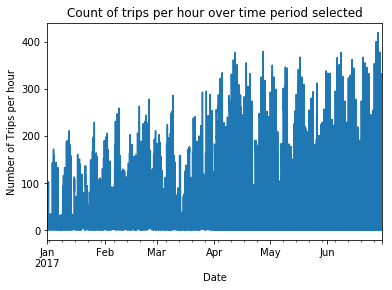

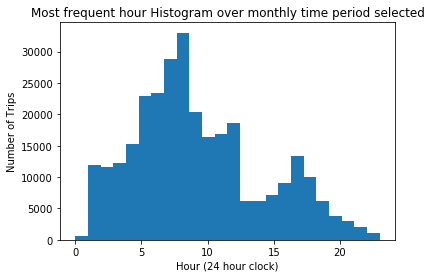

----------------------------------------

Calculating The Most Popular Stations and Trip...

The most commonly used start station is:  Columbus Circle / Union Station
The most commonly used end station is:  Columbus Circle / Union Station
The most frequent journey is: Start: Jefferson Dr & 14th St SW | End: Jefferson Dr & 14th St SW

This took 0.5270082950592041 seconds.
----------------------------------------

Calculating Trip Duration...

Total customer seconds travelled during selected period:  371183985.48400337
Mean travel time in seconds:  1237.2799516133446

This took 0.0 seconds.

The Plot below shows actual daily means 'unsmoothed' and the daily mean 'smoothed' (7-day rolling): 

N.B. Line graph of daily means will only be populated with data if 'all' days of the week have been selected


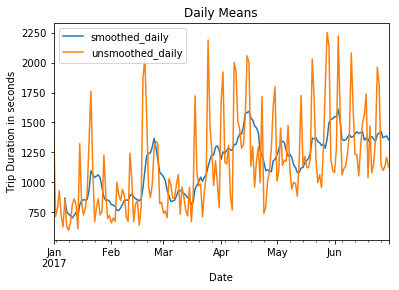

----------------------------------------

Calculating User Stats...

Subscriber    220786
Customer       79214
Name: User Type, dtype: int64
Note: No Gender or Birth Year data exists for Washington Data
----------------------------------------
Would you like to see (another) five lines of raw input data? Enter yes or no.
yes
                     Unnamed: 0             End Time  Trip Duration  \
Start Time                                                            
2017-06-21 08:36:34     1621326  2017-06-21 08:44:43        489.066   
2017-03-11 10:40:00      482740  2017-03-11 10:46:00        402.549   
2017-05-30 01:02:59     1330037  2017-05-30 01:13:37        637.251   
2017-04-02 07:48:35      665458  2017-04-02 08:19:03       1827.341   
2017-06-10 08:36:28     1481135  2017-06-10 09:02:17       1549.427   

                                                   Start Station  \
Start Time                                                         
2017-06-21 08:36:34                    

In [ ]:
# %load bikeshare_2.py
import time
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt

CITY_DATA = {'CHI': 'chicago.csv',
             'NYC': 'new_york_city.csv',
             'WDC': 'washington.csv' ,
             'nyc': 'new_york_city.csv' ,
             'chi': 'chicago.csv' ,
             'wdc': 'washington.csv'}

def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.

    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('Hello! Let\'s explore some US bikeshare data!')
    # get user input for city (chicago, new york city, washington).
    while True:
        try:
            city_list = ("CHI","NYC","WDC","chi","nyc","wdc")
            city = str(input("Would you like to see data for Chicago(enter'CHI'), New York (enter 'NYC')  or Washington? (enter 'WDC')"))
            if city in city_list:
                break            
        except:
            print("That's not a valid city name! Please try again")
        
    # get user input for month (all, january, february, ... , june)
    while True:
        try:
            month_list = ('january', 'february', 'march', 'april', 'may', 'june','all')
            month = str(input("Would you like to see data for 'all' months or for 'january' or 'february' or 'march' or 'april' or 'may' or 'june'?"))
            if month in month_list:
                break
        except:
            print("That's not a valid month! Please try again")
    
    # get user input for day of week
    while True:
        try:
            day_list = ('monday', 'tuesday','wednesday','thursday','friday','saturday','sunday','all')
            day = str(input("Would you like to see data for 'all' days of the week or 'monday' or 'tuesday' or 'wednesday' or 'thursday' or 'friday' or 'saturday' or 'sunday'?"))
            if day in day_list:
                break            
        except:
            print("That's not a valid day of week! Please try again")
     
    print('-'*40)
    return city, month, day


def load_data(city, month, day):
    """    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - pandas DataFrame containing city data filtered by month and day
    """
    
    # load data file into a dataframe (try CITY_DATA[city] as the argument to print_csv)
    df = pd.read_csv(CITY_DATA[city],parse_dates=True,index_col='Start Time')
    df['Start Time'] = df.index
    
    # convert the Start Time column to datetime
    #df['Start Time'] = pd.to_datetime(df['Start Time'])

    # extract month and day of week from Start Time to create new columns
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.weekday_name


    # filter by month if applicable
    if month != 'all':
        # use the index of the months list to get the corresponding int
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        month = months.index(month) + 1
    
        # filter by month to create the new dataframe
        df = df[df['month'] == month]

    # filter by day of week if applicable
    if day != 'all':
        # filter by day of week to create the new dataframe
        df = df[df['day_of_week'] == day.title()]
    
    return df


def time_stats(df):
    """Displays statistics on the most frequent times of travel."""

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()

    # display the most common month
    try:
        popular_month = stat.mode(df.month)
        print("The most frequent month is: ", popular_month)
    except: #for when there is more than one popular month
        list_most_pop_months = df.month.max() #only gives one of the maximum values but no error
        print('The most popular trips include: ', list_most_pop_months)
        
    # display the most common day of week
    try:
        popular_day_of_week = stat.mode(df.day_of_week)
        print("The most frequent day of week is: ", popular_day_of_week)
    except: #for when there is a tie and more than one day of the week that is most common
        list_most_pop_days = df.day_of_week.max() #only gives one of the maximum values but no error
        print('The most popular day is: ', list_most_pop_days)  
    
    # display the most common start hour
    df['hour'] = df['Start Time'].dt.hour
    hourly_count = df['Trip Duration'].resample('H').count()
    max_trips = max(hourly_count)
    popular_hour = stat.mode(df.hour)
    print('Most Frequent Start Hour: ', popular_hour)
    print("\nMaximum number of Trips per Hour", max_trips)
    print("\nThis took %s seconds." % (time.time() - start_time))
    
    #print histogram of count of trips per hour for time period selected
    # this code is above 'hourly_count = df['Trip Duration'].resample('H').count()'
    hourly_count.plot()
    plt.title('Count of trips per hour over time period selected')
    plt.ylabel('Number of Trips per hour')
    plt.xlabel('Date')
    plt.show()
    
    #print histogram of start times for time period selected
    plt.hist(df.hour,bins=24)
    plt.title('Most frequent hour Histogram over monthly time period selected')
    plt.ylabel('Number of Trips')
    plt.xlabel('Hour (24 hour clock)')
    plt.show()
    print('-'*40)


def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    # display most commonly used start station
    popular_start = stat.mode(df['Start Station'])
    print('The most commonly used start station is: ', popular_start)
    
    # display most commonly used end station
    popular_end = stat.mode(df['End Station'])
    print('The most commonly used end station is: ', popular_end)


    # display most frequent combination of start station and end station trip
    df['Start_and_End_Stations'] = "Start: " + df['Start Station'] + " | End: " + df['End Station'] 
    popular_trip = df.groupby(['Start Station','End Station']).count()
    #code to deal with situation if there is is more than one mode and how both modes can be printed out
    try:
        highest = stat.mode(df['Start_and_End_Stations'])
        print('The most frequent journey is:', highest)
    except: #use this code when there is more than one most popular trip
        list_most_pop_trips = popular_trip[popular_trip['Start Time'] == popular_trip['Start Time'].max()].index.tolist()
        print('The most popular trips include: ', list_most_pop_trips)
        #highest = df['Start_and_End_Stations'].max() - resolves mode tie error but only gives one value
        #print('The most popular trips include: ', popular_trip['Start_and_End_Stations'].idxmax()) only gives one trip
        
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    # display total travel time
    total_travel_time = df['Trip Duration'].sum()
    print('Total customer seconds travelled during selected period: ', total_travel_time)

    # display mean travel time
    mean_travel_time = df['Trip Duration'].mean()
    print('Mean travel time in seconds: ', mean_travel_time)
    print("\nThis took %s seconds." % (time.time() - start_time))
    
    print("\nThe Plot below shows actual daily means 'unsmoothed' and the daily mean 'smoothed' (7-day rolling): ")
    print("\nN.B. Line graph of daily means will only be populated with data if 'all' days of the week have been selected")
    daily_mean = df['Trip Duration'].resample('D').mean()
    daily_mean_smoothed = daily_mean.rolling(window=7).mean()
    daily_compare = pd.DataFrame({'smoothed_daily':daily_mean_smoothed, 'unsmoothed_daily':daily_mean})
    daily_compare.plot()
    plt.title('Daily Means')
    plt.ylabel('Trip Duration in seconds')
    plt.xlabel('Date')
    plt.show()
    # I found Gaps in NYC data Feb 9, Mar 13-15 2017 traced it to 2 Blizzards - no imputation / interpolation required!!!
    # Supersleuth Analyst finds the anomoly again!!
    
    print('-'*40)


def user_stats(df):
    """Displays statistics on bikeshare users."""

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    # Display counts of user types
    print(df['User Type'].value_counts(dropna=False))
    
    try:
        # Display counts of gender
        print(df['Gender'].value_counts(dropna=True))

        # Display earliest, most recent, and most common year of birth
        #code below removes rows with nan in 'Birth Year'
        df_nonan = df[~np.isnan(df['Birth Year'])]
    
        # Filtering ages that are too old and unrealistic and ages that are too young
        age_filter = df_nonan.loc[(df_nonan['Birth Year'] > 1910) & (df_nonan['Birth Year'] < 2005)]
        print("Earliest year of birth: ", int(age_filter['Birth Year'].min()))
        print("\nMost recent year of birth: ", int(age_filter['Birth Year'].max()))
        print("\nMost common year of birth: ", int(stat.mode(age_filter['Birth Year'])))
        print("\nThis took %s seconds." % (time.time() - start_time))
        
        # draw a histogram of the age profile to provide some insight of the population
        print("\nAge profile of trip takers (N.B. data filtered to include birth dates > 1910 and < 2005): ")
        plt.hist(age_filter['Birth Year'],bins=30)
        plt.title('Birth Dates of Travellers')
        plt.ylabel('Number of Trips')
        plt.xlabel('Birth Year')
        plt.show()
    except:
        # by examining the column variables for the three datasets it is known a priori that Washington data
        print("Note: No Gender or Birth Year data exists for Washington Data")
    print('-'*40)

def raw_stats(df):
    """Display raw statistics upon users request"""
    
    #setup counter start at zero
    countRaw = 0
    while True:
        
        try:
            #get user input as to whether raw data output is desired - amended dataframe contains the raw data rows & columns
            raw = str(input("Would you like to see (another) five lines of input data? Enter yes or no.\n"))
            if raw == 'yes':
                print(df.iloc[(0+countRaw):(5+countRaw),:])
                countRaw = countRaw + 5
            elif raw == 'no':
                break
        except:
            print('Incorrect Input')        
            
    print('-'*40)
        
def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)

        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)
        raw_stats(df)
        
        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break


if __name__ == "__main__":
	main()